## 1. Importing Files 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Loading data

In [101]:
raw_data=pd.read_csv("test1.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Checking the summary of data

In [102]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## 2. PREPROCESSING DATA

## Dropping unecessary columns

Model is not a significant feature, since most of the information of a car can be derived from other features like "Body","Mileage" and "EngineV".

In [103]:
data=raw_data.drop(["Model"],axis=1)
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


## Dealing with missing values

In [104]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

## Deleting missing values
We see that "Price" and "EngineV" has a lot of missing values but it consists of under 5% of the total observations, hence were good to go when it comes to deleting observations with missing values

In [105]:
data_no_NA=data.dropna(axis=0)
data_no_NA.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Exploring the data distribution

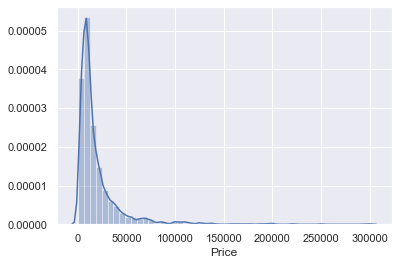

In [106]:
sns.distplot(data_no_NA["Price"])  

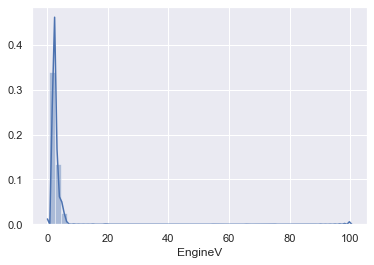

In [107]:
sns.distplot(data_no_NA["EngineV"])

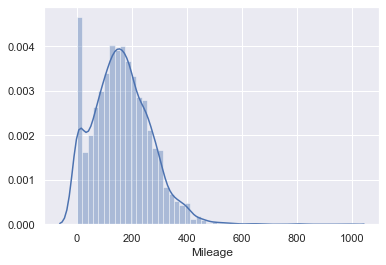

In [108]:
sns.distplot(data_no_NA["Mileage"])

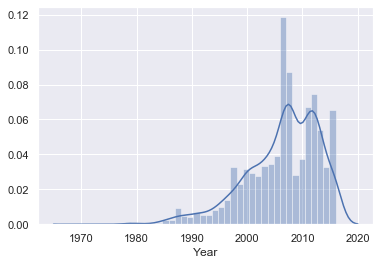

In [109]:
sns.distplot(data_no_NA["Year"])

## removing outliers
Here after using the describe method you can see that along with "Price","EngineV","Mileage" are greatly afected by outliers, these values are the reason why the data does not represent a normal distribution
in case of "Price", we see that the maximum value is much greater than all 4 quartile values, ( even the 75% one ), therefore these outliers must be removed,
to do this ill remove the top 1% of data present with respect to "Price" which will help me remove any extra outliers if present
"Year" on the other hand, has outliers present on the left hand side of the data, ie these particular observations indicate that the cars are very old and vintage.to deal with this we remove the first 1% of the data present with respect to "Year"

 we use q1 to store the 99% value with respect to "Price"
 we'll use this variable to select values from the dataset whose "Price" values are less than q1, ie the 99th percentile
 this way we have removed the top 1% percent of the data
 129812.51999999981 is the 99th percent value,
 we will now create a new data set which has only those values of "Price which is lower than 129812.51999999981"

In [110]:
q1=data_no_NA["Price"].quantile(0.99)
data_1=data_no_NA[data_no_NA["Price"]<q1]

we will similarly use the same concept when it comes to "Mileage".
We will keep the only first 99% of data with respect to "Mileage"

In [111]:
q2=data_1["Mileage"].quantile(0.99)
data_2=data_1[data_1["Mileage"]<q2]

now in case of "EngineV" we see that maximum value is 99.99, whereas most of its statistics are very well below 10, 
this means that there's been an error while recording this data. after searching in a wikipedia website, we see that the engine volume normally lies between 0.6 and 6.5 ,therefore making double digit values very unsual,
we create a new data set, which has values only less than 6.5 since that is the maximum value.
(values like 99.9 have been used in this case to denote null values, these values can be highly misleading, therefore prior knowledge of the subject is necessary to understand this )

In [112]:
data_3=data_2[data_2["EngineV"]<6.5]

in case of "Year" we notice that most cars are generally newer, but we also have a few outliers in the form of old cars, these cars are known as vintage cars. we will deal with them by storing the value of "Year" which is the first 1% and creating a data set which has those observations which are greater than that value

In [113]:
q3=data_3["Year"].quantile(0.01)
data_4=data_3[data_3["Year"]>q3]

we have successfully cleaned our data, to finalize this we create a new dataset called "data_new" which will have our cleaned data set with new indexes, since data_4 has jumbled indexes after all the deletions made

In [114]:
data_new=data_4.reset_index(drop=True)
data_new.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


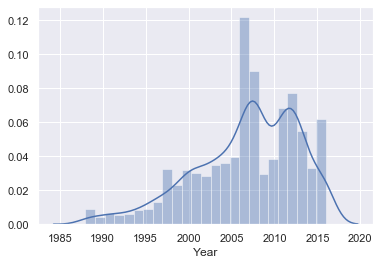

In [115]:
sns.distplot(data_new["Year"])

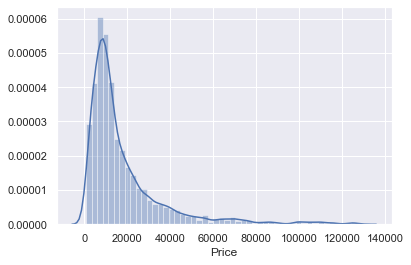

In [116]:
sns.distplot(data_new["Price"])

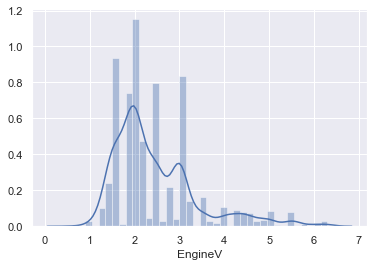

In [117]:
sns.distplot(data_new["EngineV"])

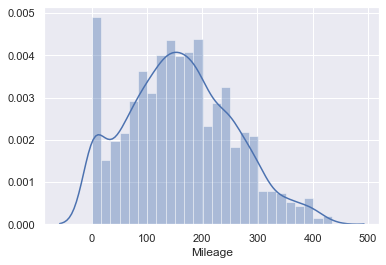

In [118]:
sns.distplot(data_new["Mileage"])

## 3. CHECKING OLS ASSUMPTIONS :- (Ordinary Least Squares)


a. Linearity :- we see here that the features are not in a linear relationship with the price of the cars, since most of the features are not normally distributed. in order to fix this issue, we transform the price to their logs ie we use the log transformation of the price to obtain a linear relationship.

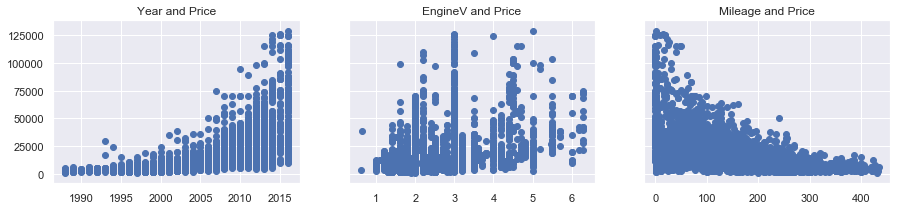

In [119]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_new["Year"],data_new["Price"])
ax1.set_title("Year and Price")
ax2.scatter(data_new["EngineV"],data_new["Price"])
ax2.set_title("EngineV and Price")
ax3.scatter(data_new["Mileage"],data_new["Price"])
ax3.set_title("Mileage and Price")
plt.show()

In [125]:
log_price=np.log(data_new["Price"])
data_new["log_price"]=log_price
# since we wont be using "Price" anymore, we'll drop it
data_new=data_new.drop(["Price"],axis=1)

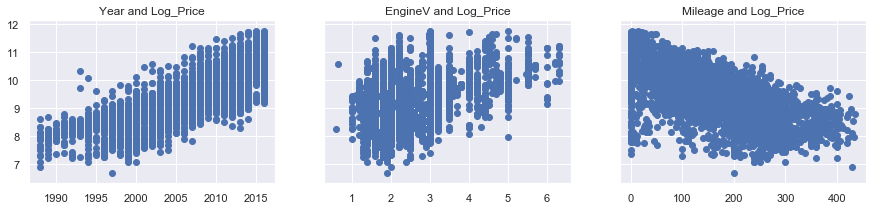

In [126]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_new["Year"],data_new["log_price"])
ax1.set_title("Year and Log_Price")
ax2.scatter(data_new["EngineV"],data_new["log_price"])
ax2.set_title("EngineV and Log_Price")
ax3.scatter(data_new["Mileage"],data_new["log_price"])
ax3.set_title("Mileage and Log_Price")
plt.show()

now we can clearly see a linear relationship between the features and the price

b. No Endogenity:- it is safe to say that this assumption is not violated, this will be discussed later when teh regression is made

c. Normality and Homoscedasiticity :-normality is assumed for a big sample following the central limit theorem the zero mean of the distribution of errors is accomplished to the inclusion of the intercept in the regression which we discussed already. Finally the homoscedasiticity assumption generally holds as we can see in the graphs.The reason for that is that we already implemented a log transformation which is the most common fix for hetero spasticity the fourth assumption is no auto correlation.

d. No Autocorrelation :-We don't really need to put much effort into that.The observations we have are not coming from time series data or panel data they are simply a snapshot of the current situation at a second hand car sales website.Each row comes from a different customer who is willing to sell their car through the platform.Logically there is no reason for the observations to be dependent on each other.

e. No Multicollinearity :- the only way to find out that our predictors are not correlated with other predictors is by using the VIF (variance inflation factor).The VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors. we do this using the statsmodels library

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_new[["Mileage","Year","EngineV"]]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1]) ]
vif["Features"]=variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


here we can see that "Year" has a vif which is abnormally huge, hence we must discard it

In [128]:
data_nm=data_new.drop(["Year"],axis=1)

now we convert our categorical variables into dummy variables

## 4. Categorical variables -> Dummy variables

In [129]:
data_with_dummies = pd.get_dummies(data_nm,drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## 5. Rearranging the columns for regression:- 

In [130]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [132]:
cols=[ 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_final=data_with_dummies[cols]
data_final.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## 6. Actual Regression:- 

Declaring variables:-

In [133]:
targets=data_final["log_price"]
inputs=data_final.drop(["log_price"],axis=1)

scaling the data:-


In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
input_scaled=scaler.transform(inputs)

Train_Test split :-

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_scaled,targets,test_size=0.2,random_state=365)

Creating the regression :-

In [137]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_hat=reg.predict(x_train)

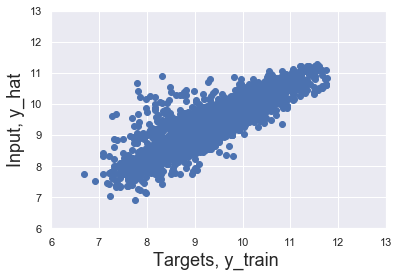

In [139]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets, y_train ",size=18)
plt.ylabel("Input, y_hat",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

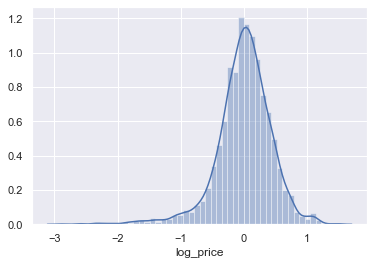

In [140]:
sns.distplot(y_train-y_hat)

In [141]:
reg.score(x_train,y_train)

0.744996578792662

## Creating a summary table :-

In [142]:
reg.intercept_

9.415239458021299

In [143]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [144]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=["Features"])
reg_summary["Weights"]=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Testing the model :-

In [145]:
y_hat_test=reg.predict(x_test)

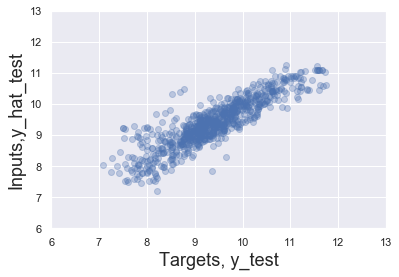

In [147]:
plt.scatter(y_test,y_hat_test,alpha=0.3)
plt.xlabel("Targets, y_test",size=18)
plt.ylabel("Inputs,y_hat_test",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [157]:
# data frame preformance:-
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=["Predictions"])
y_test=y_test.reset_index(drop=True)
df_pf["Target"]=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [162]:
# residual stores the difference between the targets and the predictions
df_pf["Residual"]=df_pf["Target"]-df_pf["Predictions"]
df_pf["Difference%"]=np.absolute(df_pf["Residual"]/df_pf["Target"]*100)
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [164]:
df_pf.sort_values(by=["Difference%"])

,Predictions,Target,Residual,Difference%
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279
